In [3]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

# Summary stats
import skimpy as sk

In [ ]:
# !pip install skimpy

In [4]:
df = pd.read_csv('/content/drive/MyDrive/TFM_Retail_Repo/_data/exp_day_sales_240911.csv')

In [5]:
display(df.head())

df.info()

,item,store_code,fecha,unidades,ejercicio,semana,sell_price,cifra,mes
0,ACCESORIES_1_008,NYC_1,2011-01-29 00:00:00.000,12,2011,4,0.6118,7.3416,1
1,ACCESORIES_1_009,NYC_1,2011-01-29 00:00:00.000,2,2011,4,2.0748,4.1496,1
2,ACCESORIES_1_015,NYC_1,2011-01-29 00:00:00.000,4,2011,4,0.9310,3.7240,1
3,ACCESORIES_1_016,NYC_1,2011-01-29 00:00:00.000,5,2011,4,0.9310,4.6550,1
4,ACCESORIES_1_022,NYC_1,2011-01-29 00:00:00.000,2,2011,4,9.1238,18.2476,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18550276 entries, 0 to 18550275
Data columns (total 9 columns):
 #   Column      Dtype  
---  ------      -----  
 0   item        object 
 1   store_code  object 
 2   fecha       object 
 3   unidades    int64  
 4   ejercicio   int64  
 5   semana      int64  
 6   sell_price  float64
 7   cifra       float64
 8   mes         int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ GB


In [6]:
# Skim describe
sk.skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│           Data Summary                 Data Types                                                               │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                        │
│ ┃ dataframe         ┃ Values   ┃ ┃ Column Type ┃ Count ┃                                                        │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                        │
│ │ Number of rows    │ 18550276 │ │ int64       │ 4     │                                                        │
│ │ Number of columns │ 9        │ │ string      │ 3     │                                                        │
│ └───────────────────┴──────────┘ │ float64     │ 2     │                                                        │
│                                  └─────────────┴───────┘                                                        │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name    ┃ NA  ┃ NA %   ┃ mean    ┃ sd      ┃ p0      ┃ p25     ┃ p50    ┃ p75    ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ unidades       │   0 │      0 │   3.541 │   6.214 │       1 │       1 │      2 │      4 │    763 │    ▇    │  │
│ │ ejercicio      │   0 │      0 │    2014 │   1.503 │    2011 │    2012 │   2014 │   2015 │   2016 │ ▅▆▇▇▇▃  │  │
│ │ semana         │   0 │      0 │   25.84 │   15.13 │       1 │      12 │     25 │     39 │     53 │ ▇▇▆▇▇▆  │  │
│ │ sell_price     │   0 │      0 │   4.748 │   3.936 │   0.012 │   2.376 │  3.576 │  5.976 │  134.1 │    ▇    │  │
│ │ cifra          │   0 │      0 │   12.45 │   18.29 │   0.012 │   4.176 │  7.387 │   14.3 │   2597 │    ▇    │  │
│ │ mes            │   0 │      0 │   6.347 │   3.459 │       1 │       3 │      6 │      9 │     12 │ ▇▇▇▇▇▇  │  │
│ └────────────────┴─────┴────────┴─────────┴─────────┴─────────┴─────────┴────────┴────────┴────────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ item                      │       0 │          0 │                            1 │                 18550276 │  │
│ │ store_code                │       0 │          0 │                            1 │                 18550276 │  │
│ │ fecha                     │       0 │          0 │                            2 │                 37100552 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [8]:
# Convertimos 'fecha' a date
df['fecha'] = pd.to_datetime(df['fecha']).dt.date

In [10]:
# # Contar productos únicos por año
unique_items_per_year = df.groupby('ejercicio')['item'].nunique()

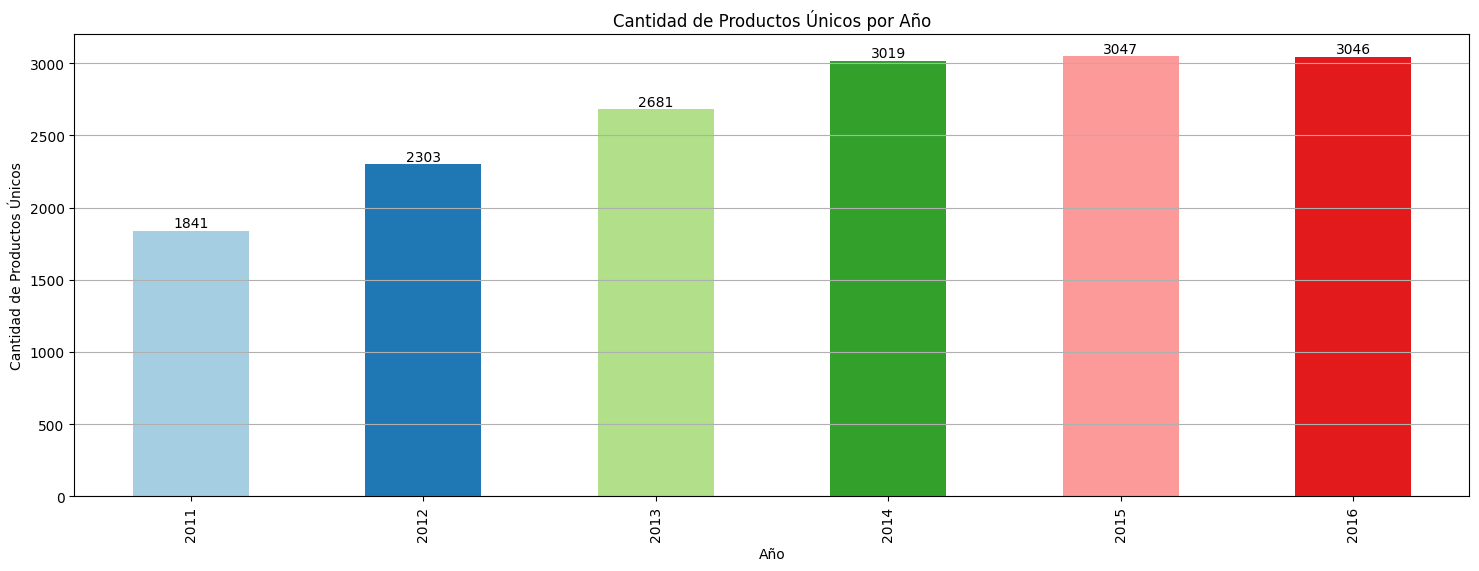

In [11]:
# Configuración del tamaño del gráfico
plt.figure(figsize=(18, 6))

# Crear el gráfico de barras
bars = unique_items_per_year.plot(kind='bar', color=plt.cm.Paired(range(len(unique_items_per_year))))

# Título y etiquetas
plt.title('Cantidad de Productos Únicos por Año')
plt.xlabel('Año')
plt.ylabel('Cantidad de Productos Únicos')

# Mostrar el total de items únicos encima de cada barra
for index, value in enumerate(unique_items_per_year):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

# Mostrar el gráfico
plt.grid(True, axis='y')
plt.show()